# Dimensionality Reduction

Simplify your data to visualize relationships between classes.

> [A multivariate study of variation in two species of rock crab of the genus Leptograpsus](https://www.researchgate.net/publication/243766527_A_multivariate_study_of_variation_in_two_species_of_rock_crab_of_genus_Leptograpsus)

In [2]:
# dependencies
import io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import set_config
set_config(display='text') # display estimators as text

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Dataset

In [3]:
pd.set_option('display.precision', 3)
leptograpsus_data = pd.read_csv('data/A_multivariate_study_of_variation_in_two_species_of_rock_crab_of_genus_Leptograpsus.csv')
leptograpsus_data.head()

sp sex  index   FL   RW    CL    CW   BD
0  B   M      1  8.1  6.7  16.1  19.0  7.0
1  B   M      2  8.8  7.7  18.1  20.8  7.4
2  B   M      3  9.2  7.8  19.0  22.4  7.7
3  B   M      4  9.6  7.9  20.1  23.1  8.2
4  B   M      5  9.8  8.0  20.3  23.0  8.2

|   | sp | sex | index | FL | RW | CL | CW | BD |
| -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | B | M | 1 | 8.1 | 6.7 | 16.1 | 19.0 | 7.0 |
| 1 | B | M | 2 | 8.8 | 7.7 | 18.1 | 20.8 | 7.4 |
| 2 | B | M | 3 | 9.2 | 7.8 | 19.0 | 22.4 | 7.7 |
| 3 | B | M | 4 | 9.6 | 7.9 | 20.1 | 23.1 | 8.2 |
| 4 | B | M | 5 | 9.8 | 8.0 | 20.3 | 23.0 | 8.2 |

### Preprocessing

In [4]:
data = leptograpsus_data.rename(columns={
    'sp': 'species',
    'FL': 'Frontal Lobe',
    'RW': 'Rear Width',
    'CL': 'Carapace Midline',
    'CW': 'Maximum Width',
    'BD': 'Body Depth'})

data['species'] = data['species'].map({'B':'Blue', 'O':'Orange'})
data['sex'] = data['sex'].map({'M':'Male', 'F':'Female'})

data.head()

species   sex  index  Frontal Lobe  Rear Width  Carapace Midline  \
0    Blue  Male      1           8.1         6.7              16.1   
1    Blue  Male      2           8.8         7.7              18.1   
2    Blue  Male      3           9.2         7.8              19.0   
3    Blue  Male      4           9.6         7.9              20.1   
4    Blue  Male      5           9.8         8.0              20.3   

   Maximum Width  Body Depth  
0           19.0         7.0  
1           20.8         7.4  
2           22.4         7.7  
3           23.1         8.2  
4           23.0         8.2

|   | species | sex | index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth |
| -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Blue | Male | 1 | 8.1 | 6.7 | 16.1 | 19.0 | 7.0 |
| 1 | Blue | Male | 2 | 8.8 | 7.7 | 18.1 | 20.8 | 7.4 |
| 2 | Blue | Male | 3 | 9.2 | 7.8 | 19.0 | 22.4 | 7.7 |
| 3 | Blue | Male | 4 | 9.6 | 7.9 | 20.1 | 23.1 | 8.2 |
| 4 | Blue | Male | 5 | 9.8 | 8.0 | 20.3 | 23.0 | 8.2 |

In [5]:
data.shape
# (200, 8)

data_columns = ['Frontal Lobe',
                'Rear Width',
                'Carapace Midline',
                'Maximum Width',
                'Body Depth']

data[data_columns].describe()

Frontal Lobe  Rear Width  Carapace Midline  Maximum Width  Body Depth
count       200.000     200.000           200.000        200.000     200.000
mean         15.583      12.738            32.105         36.415      14.030
std           3.495       2.573             7.119          7.872       3.425
min           7.200       6.500            14.700         17.100       6.100
25%          12.900      11.000            27.275         31.500      11.400
50%          15.550      12.800            32.100         36.800      13.900
75%          18.050      14.300            37.225         42.000      16.600
max          23.100      20.200            47.600         54.600      21.600

| Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth |
| -- | -- | -- | -- | -- |
| 200.000 | 200.000 | 200.000 | 200.000 | 200.000 | 200.000 |
| 25.500 | 15.583 | 12.800 | 32.100 | 36.800 | 13.900 |
| 14.467 | 3.495 | 2.573 | 7.119 | 7.872 | 3.425 |
| 1.000 | 7.200 | 6.500 | 14.700 | 17.100 | 6.100 |
| 13.000 | 12.900 | 11.000 | 27.275 | 31.500 | 11.400 |
| 25.500 | 15.550 | 12.800 | 32.100 | 36.800 | 13.900 |
| 38.000 | 18.050 | 14.300 | 37.225 | 42.000 | 16.600 |
| 50.000 | 23.100 | 20.200 | 47.600 | 54.600 | 21.600 |

The dataset now needs to be segmented into __4 Classes__ for sex (`male`, `female`) and species (`blue`, `orange`). We can add this identifier as an additional row to our dataset inform of a concatenate value from the species and sex feature:

In [6]:
data['class'] = data.species + data.sex
data['class'].value_counts()

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: class, dtype: int64

The entire dataset has a size of `200` and each class is equally represented with `50` specimens:

* BlueMale :        __50__
* BlueFemale :      __50__
* OrangeMale :      __50__
* OrangeFemale :     __50__

Name: class, dtype: int64

### Visualization

#### Boxplots

<AxesSubplot: title={'center': 'Body Depth'}, xlabel='class'>

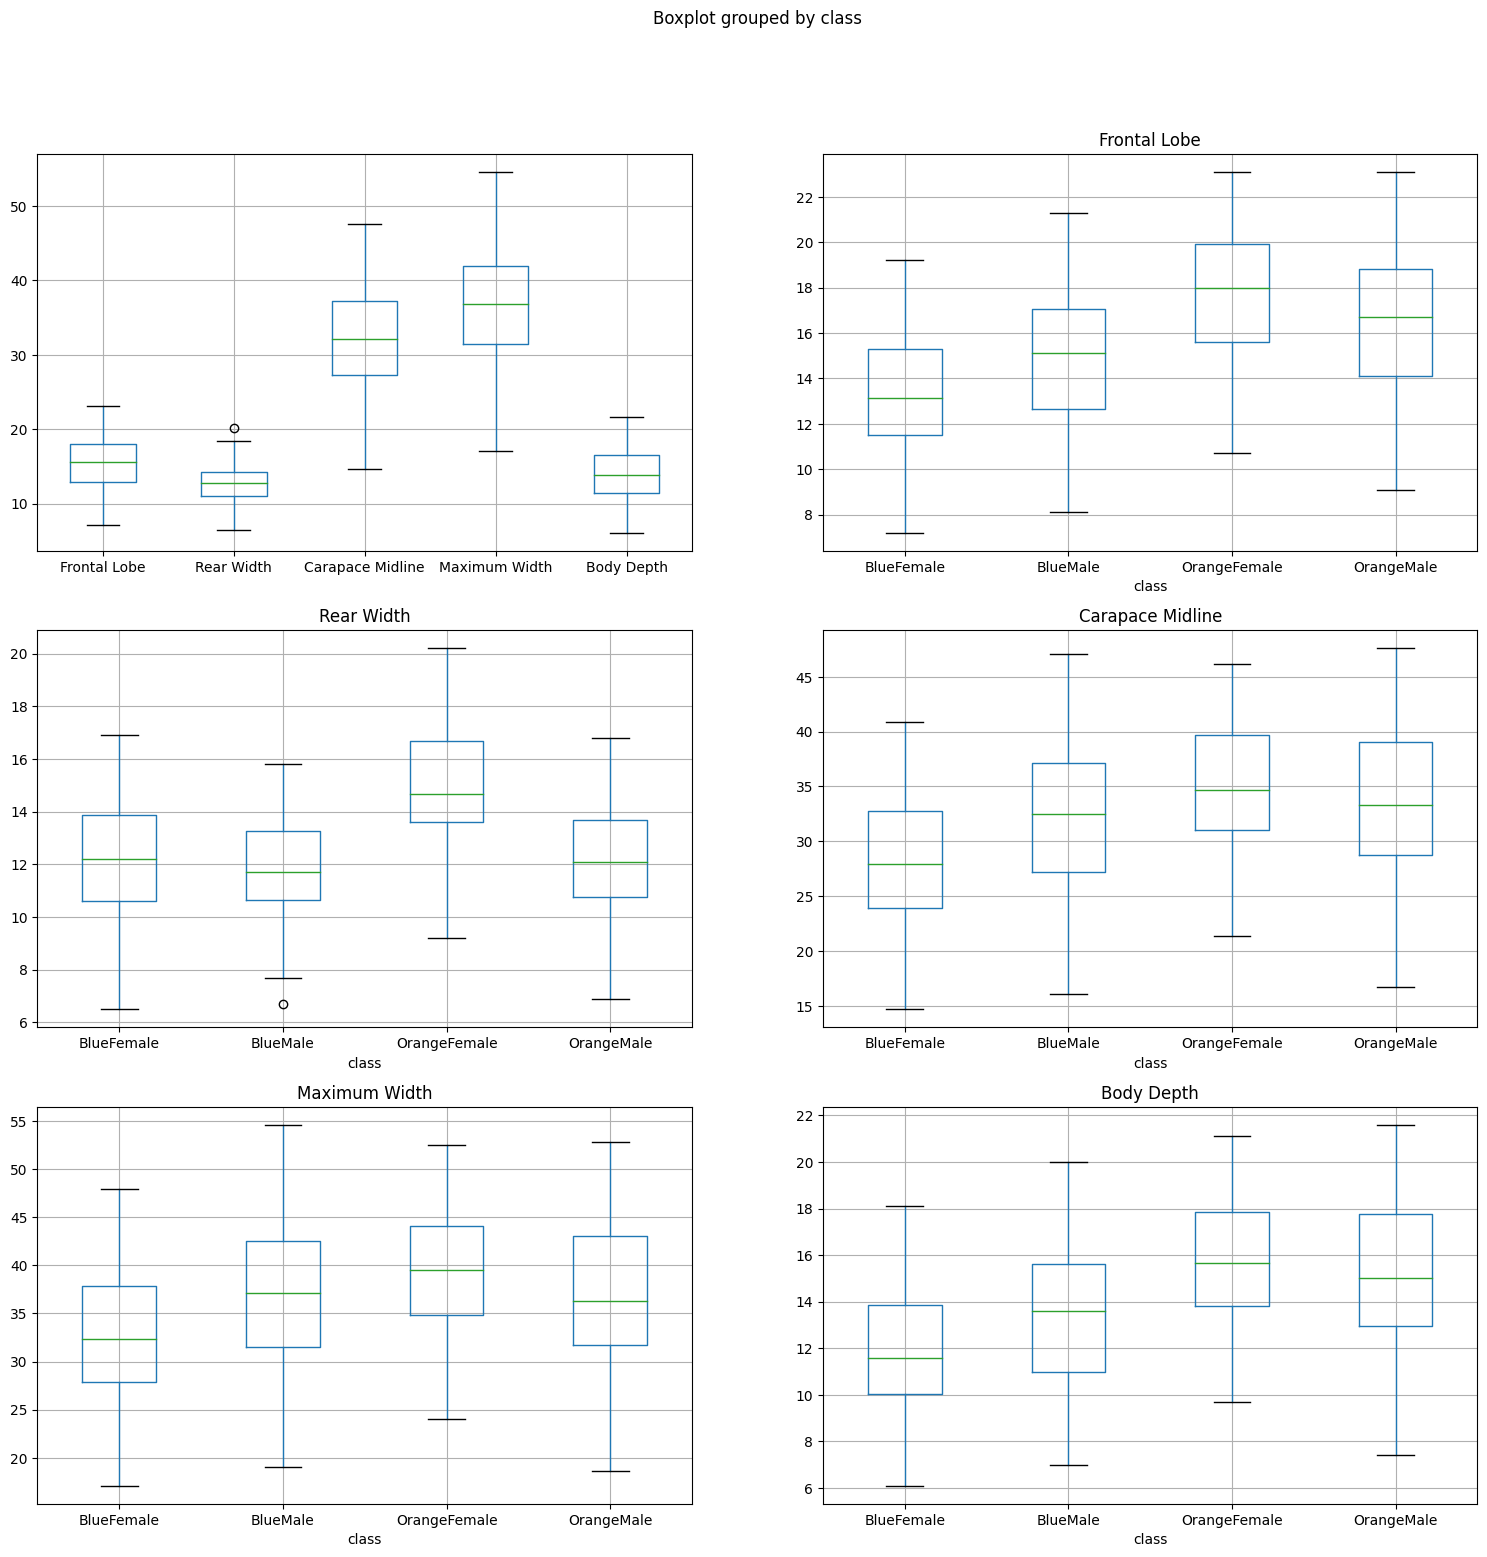

In [7]:
# plot features vs classes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,18))
data[data_columns].boxplot(ax=axes[0,0])
data.boxplot(column='Frontal Lobe', by='class', ax=axes[0,1])
data.boxplot(column='Rear Width', by = 'class', ax=axes[1,0])
data.boxplot(column='Carapace Midline', by='class', ax=axes[1,1])
data.boxplot(column='Maximum Width', by = 'class', ax=axes[2,0])
data.boxplot(column='Body Depth', by = 'class', ax=axes[2,1])

![Dimensionality Reduction](./assets/Dimensionality_Reduction_01.png)

While the orange and blue female show a good separation in several features the male counterparts are very close together. The __Body Depth__ and __Frontal Lobe__ dimensions are the best features to differentiate both species in the male sub class.

#### Histograms

array([[<AxesSubplot: title={'center': 'Frontal Lobe'}>,
        <AxesSubplot: title={'center': 'Rear Width'}>,
        <AxesSubplot: title={'center': 'Carapace Midline'}>],
       [<AxesSubplot: title={'center': 'Maximum Width'}>,
        <AxesSubplot: title={'center': 'Body Depth'}>, <AxesSubplot: >]],
      dtype=object)

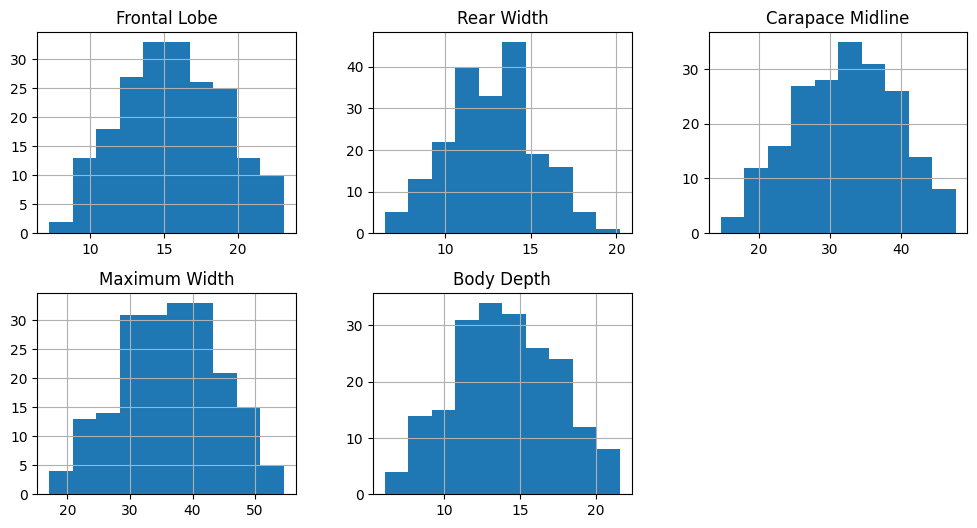

In [8]:
data[data_columns].hist(figsize=(12,6), layout=(2,3))

![Dimensionality Reduction](./assets/Dimensionality_Reduction_02.png)

<AxesSubplot: xlabel='Body Depth', ylabel='Count'>

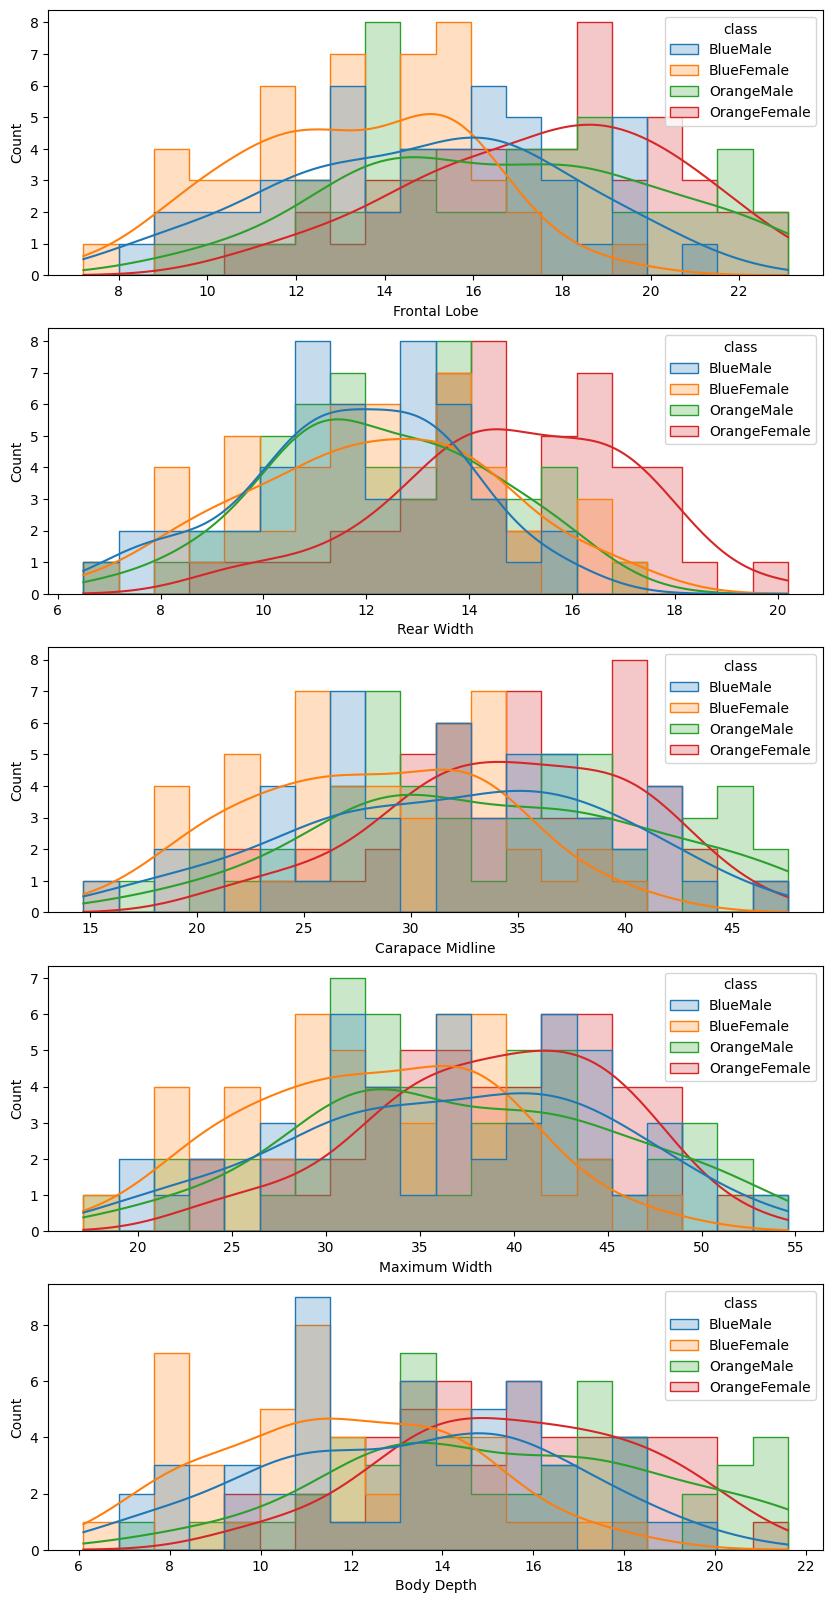

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,20))
sns.histplot(data, x='Frontal Lobe', hue='class', kde=True, element='step', bins=20, ax=axes[0])
sns.histplot(data, x='Rear Width', hue='class', kde=True, element='step', bins=20, ax=axes[1])
sns.histplot(data, x='Carapace Midline', hue='class', kde=True, element='step', bins=20, ax=axes[2])
sns.histplot(data, x='Maximum Width', hue='class', kde=True, element='step', bins=20, ax=axes[3])
sns.histplot(data, x='Body Depth', hue='class', kde=True, element='step', bins=20, ax=axes[4])

![Dimensionality Reduction](./assets/Dimensionality_Reduction_03.png)

Again, the orange and blue coloured distributions - representing the females of the orange and blue species - are well seperated. But there is a large overlap between the male counterparts. We can see that while the boxplot still showed a visible difference in the __Frontal Lobe__ and __Body Depth__ mean value, it is much harder to differentiate the histrograms.

#### Pairplot

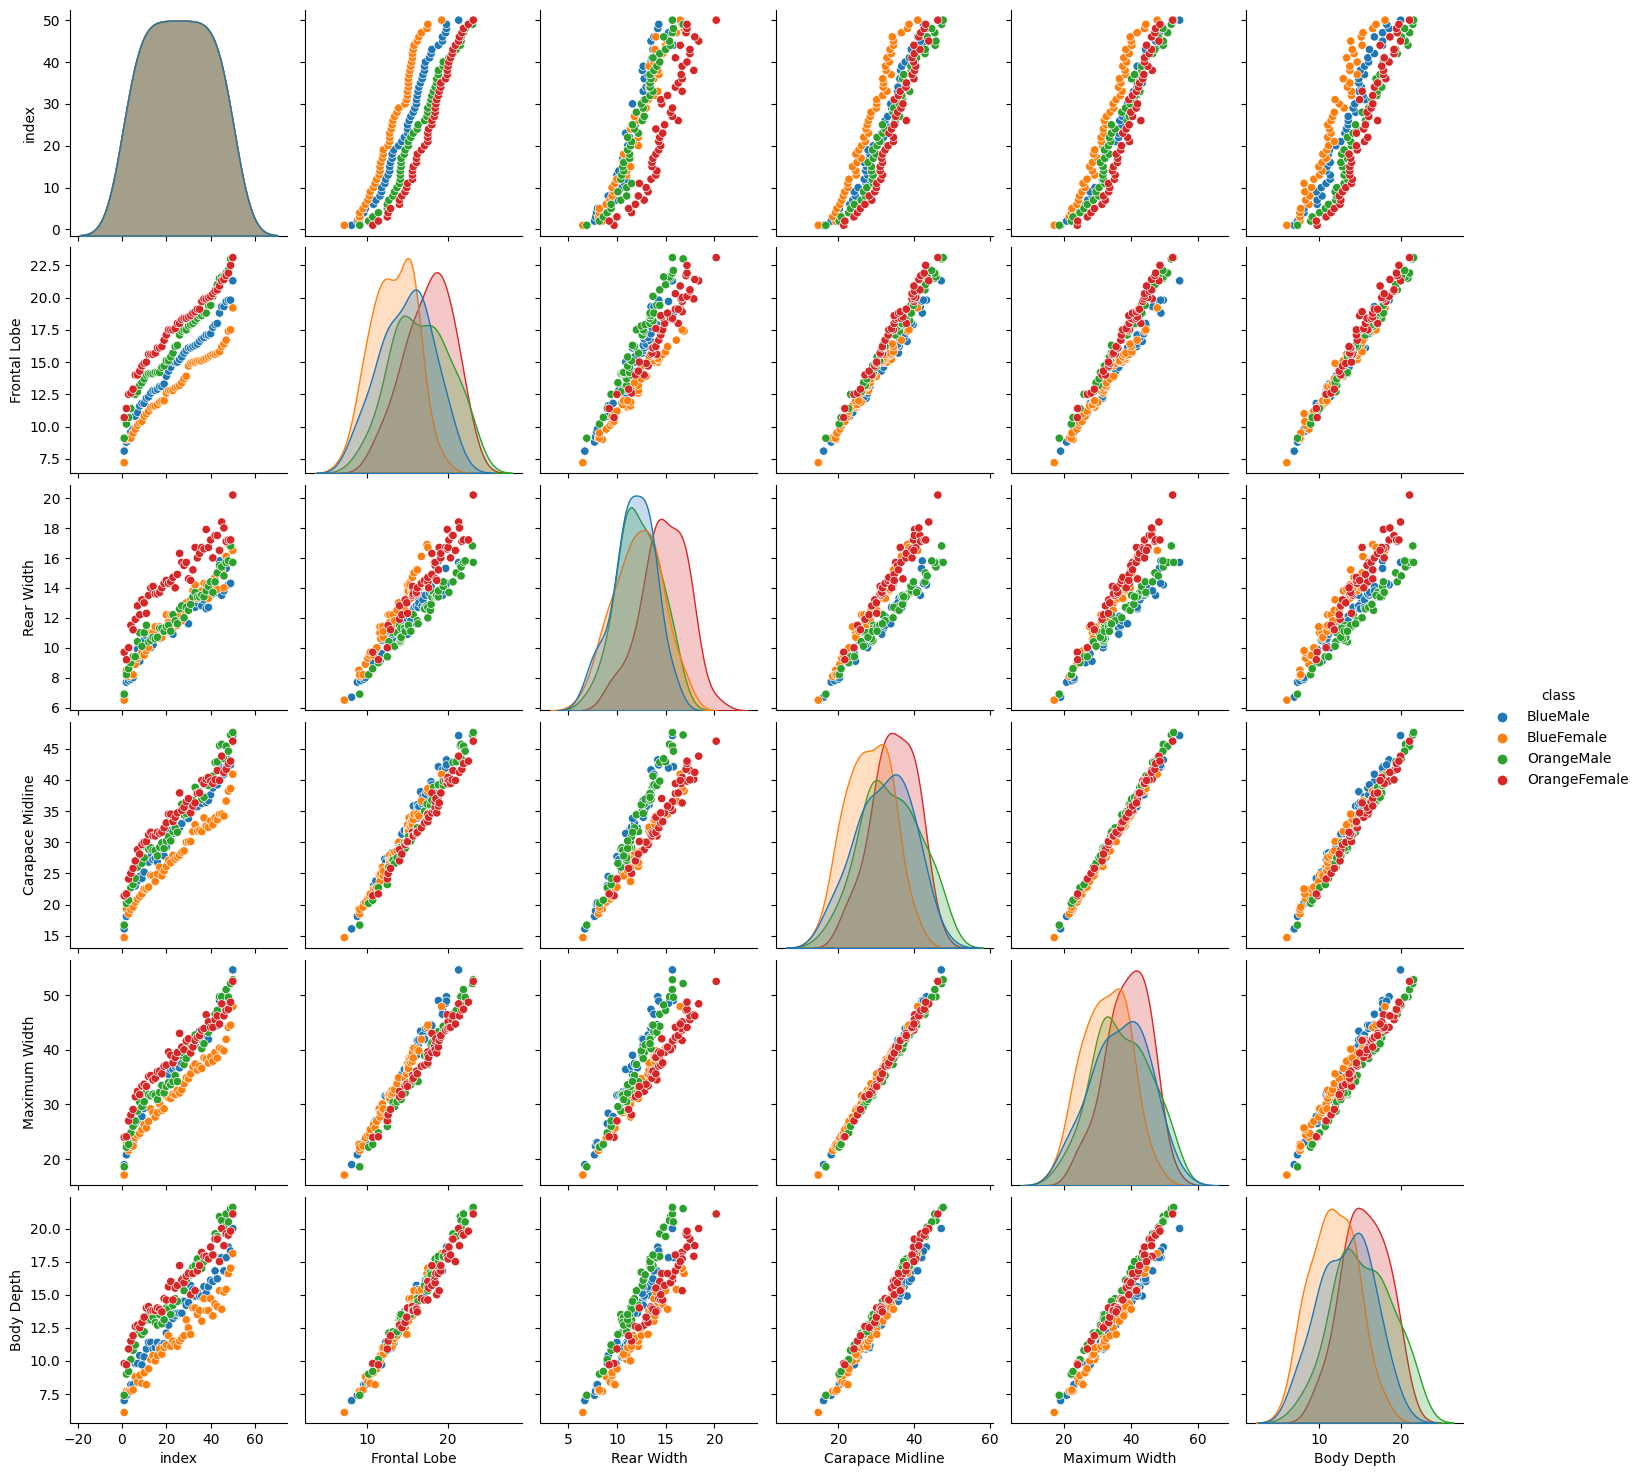

In [10]:
sns.pairplot(data, hue='class')
# sns.pairplot(data, hue='class', diag_kind="hist")

![Dimensionality Reduction](./assets/Dimensionality_Reduction_04.png)

The pairplot plots the relationships of each pair of features. We can see that there are several plots that separate between our female and male classes. For example the __Rear Width__ separates the green/blue (male) dots from the orange/red (female) ones. There is some separation between both female species (red/orange dots) in the __Frontal Lobe__ and __Body Depth__ graphs. But again, it is hard to separate both male species - there is always a strong overlap between the blue and green dots.

## Principal Component Analaysis

A PCA is a reduction technique that transforms a high-dimensional data set into a new lower-dimensional data set. At the same time, preserving the maximum amount of information from the original data.

In [11]:
# Normalize data columns before applying PCA
data_norm = data.copy()
data_norm[data_columns] = StandardScaler().fit_transform(data[data_columns])
data_norm.describe().T

count       mean     std    min     25%        50%     75%  \
index             200.0  2.550e+01  14.467  1.000  13.000  2.550e+01  38.000   
Frontal Lobe      200.0 -7.105e-17   1.003 -2.404  -0.770 -9.465e-03   0.708   
Rear Width        200.0  6.040e-16   1.003 -2.430  -0.677  2.396e-02   0.608   
Carapace Midline  200.0  1.066e-16   1.003 -2.451  -0.680 -7.745e-04   0.721   
Maximum Width     200.0 -4.974e-16   1.003 -2.460  -0.626  4.909e-02   0.711   
Body Depth        200.0  0.000e+00   1.003 -2.321  -0.770 -3.820e-02   0.752   

                     max  
index             50.000  
Frontal Lobe       2.156  
Rear Width         2.907  
Carapace Midline   2.182  
Maximum Width      2.316  
Body Depth         2.216

Normalization sets the mean of all data columns to ~`0` and the standard deviation to ~`1`:

|  | count | mean | std | min | 25% | 50% | 75% | max |
| -- | -- | -- | -- | -- | -- | -- | -- | -- |
| index | 200.0 | 2.550e+01 | 14.467 | 1.000 | 13.000 | 2.550e+01 | 38.000 | 50.000 |
| Frontal Lobe | 200.0 | -7.105e-17 | 1.003 | -2.404 | -0.770 | -9.465e-03 | 0.708 | 2.156 |
| Rear Width | 200.0 | 6.040e-16 | 1.003 | -2.430 | -0.677 | 2.396e-02 | 0.608 | 2.907 |
| Carapace Midline | 200.0 | 1.066e-16 | 1.003 | -2.451 | -0.680 | -7.745e-04 | 0.721 | 2.182 |
| Maximum Width | 200.0 | -4.974e-16 | 1.003 | -2.460 | -0.626 | 4.909e-02 | 0.711 | 2.316 |
| Body Depth | 200.0 | 0.000e+00 | 1.003 | -2.321 | -0.770 | -3.820e-02 | 0.752 | 2.216 |

In [12]:
# number of classes = 5
no_components = 5
principal = PCA(n_components = no_components)
principal.fit(data_norm[data_columns])

data_transformed=principal.transform(data_norm[data_columns])
print(data_transformed.shape)
# (200, 5)

singular_values = principal.singular_values_
variance_ratio = principal.explained_variance_ratio_
# show variance vector for each dimension
print(variance_ratio)
print(variance_ratio.cumsum())
print(singular_values)

(200, 5)
[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]
[30.94781021  5.50790717  3.05394742  1.49233757  0.58509446]


| | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth |
| -- | -- | -- | -- | -- | -- |
| Explained Variance | 9.57766957e-01 | 3.03370413e-02| 9.32659482e-03 | 2.22707143e-03 | 3.42335531e-04 |
| Cumulative Sum | 0.95776696 | 0.988104 | 0.99743059 | 0.99965766 | 1. |
| Singular Values | 30.94781021 | 5.50790717 | 3.05394742 | 1.49233757 | 0.58509446 |

Adding variables to our model can increase our models performance if the added variable adds explanatory power. Too many variables, especially non-correlating or noisy dimensions, can lead to overfitting. As seen above, already using 2 (`98.8%`) or 3 (`99.7%`) of our 5 classes allows us to describe our dataset with a high accuracy - the additional 2 will not add much value.

### Scree Plot

A Scree plot is a graph useful to plot the eigenvectors. This plot is useful to determine the PCA. It orders the values in descending order that is from largest to smallest. It allows us to determine the number of Principal Component is a graphical representation by visualizing the amount of variation a value adds to a given dataset.

Text(0.5, 1.0, 'Scree Plot')

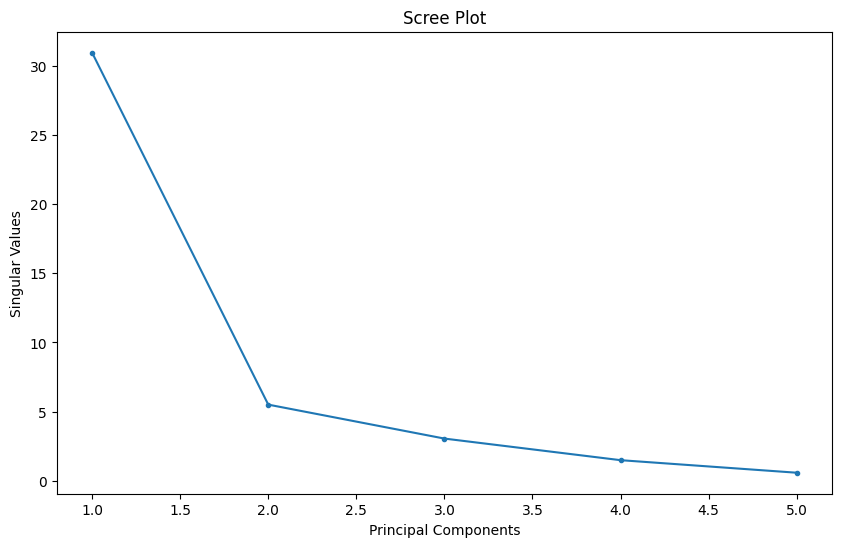

In [13]:
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, (no_components+1)), singular_values, marker='.')
y_label = plt.ylabel('Singular Values')
x_label = plt.xlabel('Principal Components')
plt.title('Scree Plot')

 According to the scree test, the "elbow" of the graph where the eigenvalues seem to level off is found and factors or components to the left of this point should be retained as significant - here this would be the first two or three classes:
    
![Dimensionality Reduction](./assets/Dimensionality_Reduction_05.png)

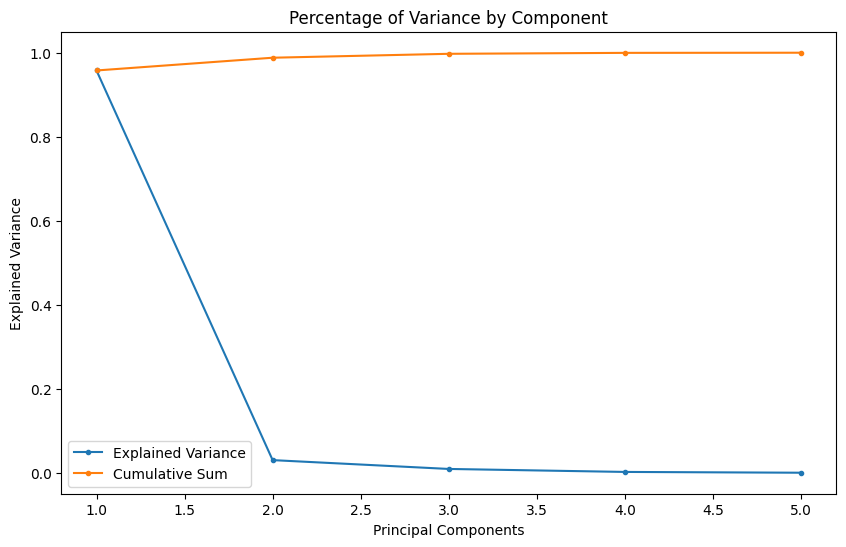

In [14]:
fig = plt.figure(figsize=(10, 6))

plt.plot(range(1, (no_components+1)), variance_ratio, marker='.', label='Explained Variance')
plt.plot(range(1, (no_components+1)), variance_ratio.cumsum(), marker='.', label='Cumulative Sum')

y_label = plt.ylabel('Explained Variance')
x_label = plt.xlabel('Principal Components')
plt.title('Percentage of Variance by Component')
plt.legend()

The values of the amount of variance a component brings to our dataset and it's cumulative sum shows the same 'elbow' to pick our principal components from:
    
![Dimensionality Reduction](./assets/Dimensionality_Reduction_06.png)

### Component PCA Weights

Our Principal Component Analysis assigned weights to each component allowing us to discard components that do not help us to classify the species in our dataset. Those weights can be visualized in a heatmap:

<AxesSubplot: >

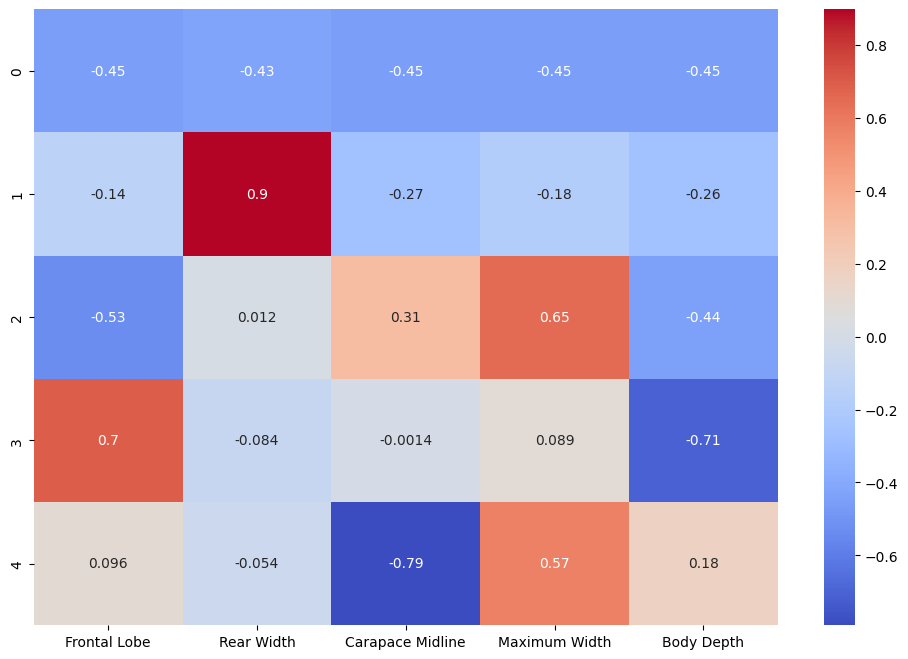

In [15]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(
    principal.components_,
    cmap='coolwarm',
    xticklabels=list(data.columns[3:-1]),
    annot=True)

![Dimensionality Reduction](./assets/Dimensionality_Reduction_07.png)

## Transformation and Visualization

In [16]:
# use 3 principal components out of the 5 components
print(data_transformed[:,:3])

# append the 3 principal components to the norm dataframe
data_norm[['PC1', 'PC2', 'PC3']] = data_transformed[:,:3]

data_norm.head()

[[ 4.92757315e+00 -2.68445304e-01 -1.22257753e-01]
 [ 4.38617639e+00 -9.40735865e-02 -3.92318876e-02]
 [ 4.12866384e+00 -1.68875924e-01  3.36436339e-02]
 [ 3.88368111e+00 -2.46008318e-01  1.45010217e-02]
 [ 3.83405492e+00 -2.24166269e-01 -1.50673107e-02]
 [ 2.95295511e+00 -2.20020733e-01  3.84281487e-02]
 [ 2.67844235e+00  3.90230788e-02  8.17102623e-02]
 [ 2.54843778e+00 -3.63383179e-01  6.25916514e-02]
 [ 2.58517895e+00 -1.17037655e-01  6.23383966e-02]
 [ 2.20585873e+00  7.91663049e-02  1.56973513e-01]
 [ 1.75857717e+00 -1.02981368e-02  3.02371578e-01]
 [ 1.68388431e+00  3.82340303e-02  1.93104441e-01]
 [ 1.74282949e+00 -3.62089809e-01  1.98638250e-01]
 [ 1.77573850e+00 -2.44730446e-01  2.20492524e-01]
 [ 1.65026614e+00 -8.20012474e-03  1.94577108e-01]
 [ 1.64056281e+00  2.83574124e-02  5.19016086e-02]
 [ 1.56438534e+00 -1.73623511e-01  2.48880297e-01]
 [ 1.47581648e+00 -9.02085974e-02  2.37007254e-01]
 [ 1.44098122e+00 -1.46732285e-02  1.64406277e-01]
 [ 1.11074684e+00 -1.76130471e-

species   sex  index  Frontal Lobe  Rear Width  Carapace Midline  \
0    Blue  Male      1        -2.146      -2.352            -2.254   
1    Blue  Male      2        -1.945      -1.963            -1.972   
2    Blue  Male      3        -1.831      -1.924            -1.846   
3    Blue  Male      4        -1.716      -1.885            -1.691   
4    Blue  Male      5        -1.659      -1.846            -1.662   

   Maximum Width  Body Depth     class    PC1    PC2    PC3  
0         -2.218      -2.058  BlueMale  4.928 -0.268 -0.122  
1         -1.989      -1.941  BlueMale  4.386 -0.094 -0.039  
2         -1.785      -1.853  BlueMale  4.129 -0.169  0.034  
3         -1.696      -1.707  BlueMale  3.884 -0.246  0.015  
4         -1.708      -1.707  BlueMale  3.834 -0.224 -0.015

|  | species | sex | index | Frontal Lobe | Rear Width | Carapace Midline | Maximum Width | Body Depth | class | PC1 | PC2 | PC3 |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | Blue | Male | 1 | -2.146 | -2.352 | -2.254 | -2.218 | -2.058 | BlueMale | 4.928 | -0.268  | -0.122 |
| 1 | Blue | Male | 2 | -1.945 | -1.963 | -1.972 | -1.989 | -1.941 | BlueMale | 4.386 | -0.094  | -0.039 |
| 2 | Blue | Male | 3 | -1.831 | -1.924 | -1.846 | -1.785 | -1.853 | BlueMale | 4.129 | -0.169  | 0.034 |
| 3 | Blue | Male | 4 | -1.716 | -1.885 | -1.691 | -1.696 | -1.707 | BlueMale | 3.884 | -0.246  | 0.015 |
| 4 | Blue | Male | 5 | -1.659 | -1.846 | -1.662 | -1.708 | -1.707 | BlueMale | 3.834 | -0.224  | -0.015 |

### 2D Plot

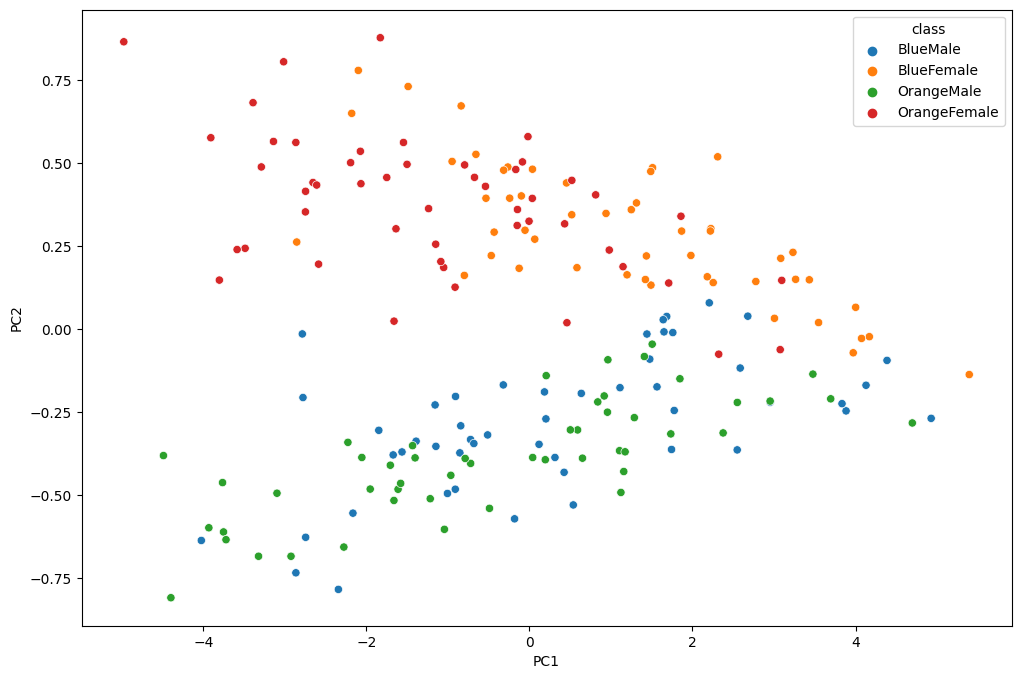

In [17]:
fig = plt.figure(figsize=(12, 8))
_ = sns.scatterplot(x='PC1', y='PC2', hue='class', data=data_norm)

![Dimensionality Reduction](./assets/Dimensionality_Reduction_08.png)

### 3D Plot

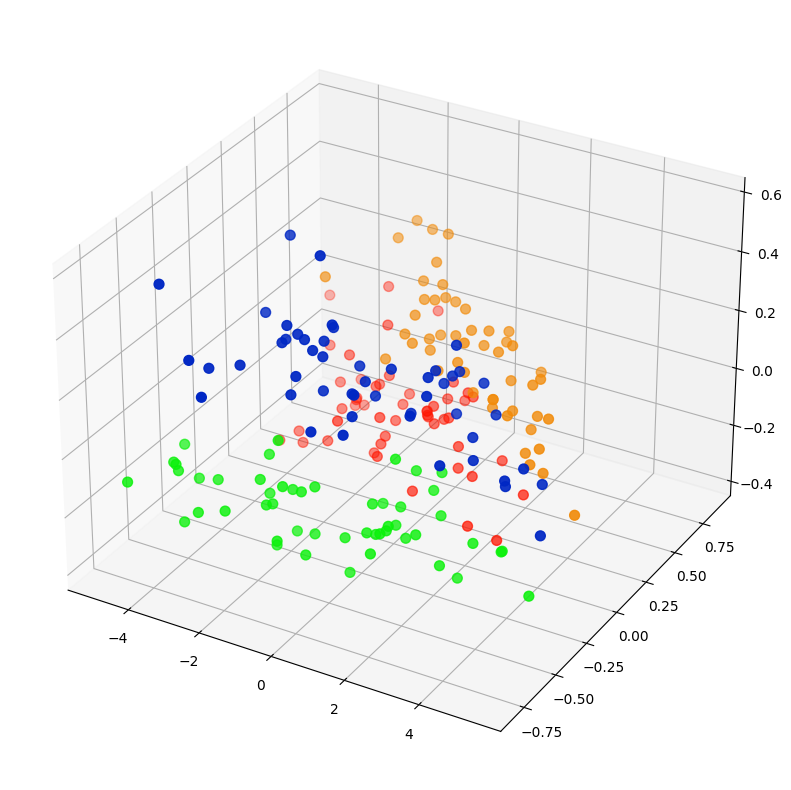

In [18]:
class_colours = {
    'BlueMale': '#0027c4', #blue
    'BlueFemale': '#f18b0a', #orange
    'OrangeMale': '#0af10a', # green
    'OrangeFemale': '#ff1500', #red
}

colours = data['class'].apply(lambda x: class_colours[x])

x=data_norm.PC1
y=data_norm.PC2
z=data_norm.PC3

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=x, ys=y, zs=z, s=50, c=colours)

In [19]:
plot = px.scatter_3d(
    data_norm,
    x = 'PC1',
    y = 'PC2',
    z='PC3',
    color='class')

plot.show()

![Dimensionality Reduction](./assets/Dimensionality_Reduction_09.png)

![Dimensionality Reduction](./assets/Dimensionality_Reduction_10.png)

Separation! Nice :)